In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('marketing_campaign_data.csv')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

## Feature Engineering

In [4]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [5]:
df['age'] = 2022 - df['Year_Birth']
df['joint_at_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['total_kid'] = df['Kidhome'] + df['Teenhome']
df['is_parent'] = np.where(df['total_kid'] > 0,1,0)

In [6]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,joint_at_age,total_kid,is_parent
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,55,0,0
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,60,2,1
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,48,0,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,30,1,1
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,33,1,1


In [7]:
## Amount spent
df['total_spent'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

## Total accept campaign
df['total_accept_campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

## Total transaction
df['total_transaction'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [8]:
#age group
df.loc[(df['age'] >= 0) & (df['age'] < 26), 'age_group'] = 'gen_z'
df.loc[(df['age'] >= 26) & (df['age'] < 42), 'age_group'] = 'millenials'
df.loc[(df['age'] >= 42) & (df['age'] < 58), 'age_group'] = 'gen_x'
df.loc[(df['age'] >= 58), 'age_group'] = 'boomers'

In [9]:
df['NumWebVisitsMonth'].unique()

array([ 7,  5,  4,  6,  8,  9, 20,  2,  3,  1, 10,  0, 14, 19, 17, 13],
      dtype=int64)

In [10]:
# conversion rate
def safe_div(x,y):
    if y == 0:
        return 0
    return x / y
df['conversion_rate'] = df.apply(lambda x: safe_div(x['total_transaction'],x['NumWebVisitsMonth']), axis = 1)

In [11]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,age_group,conversion_rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,55,0,0,1617000,0,25,boomers,3.571429
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,60,2,1,27000,0,6,boomers,1.200000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,48,0,0,776000,0,21,gen_x,5.250000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,30,1,1,53000,0,8,millenials,1.333333
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,33,1,1,422000,0,19,millenials,3.800000


In [12]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,conversion_rate
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,53.194196,44.222321,0.950446,0.715179,6.057982e+05,0.297768,14.862054,4.395222
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,12.022855,0.751803,0.451430,6.022493e+05,0.678381,7.677173,4.913624
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000,16.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,45.000000,36.000000,0.000000,0.000000,6.875000e+04,0.000000,8.000000,1.222222
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,52.000000,43.000000,1.000000,1.000000,3.960000e+05,0.000000,15.000000,2.600000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,63.000000,54.000000,1.000000,1.000000,1.045500e+06,0.000000,21.000000,5.350000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,129.000000,121.000000,3.000000,1.000000,2.525000e+06,4.000000,44.000000,43.000000


<AxesSubplot:>

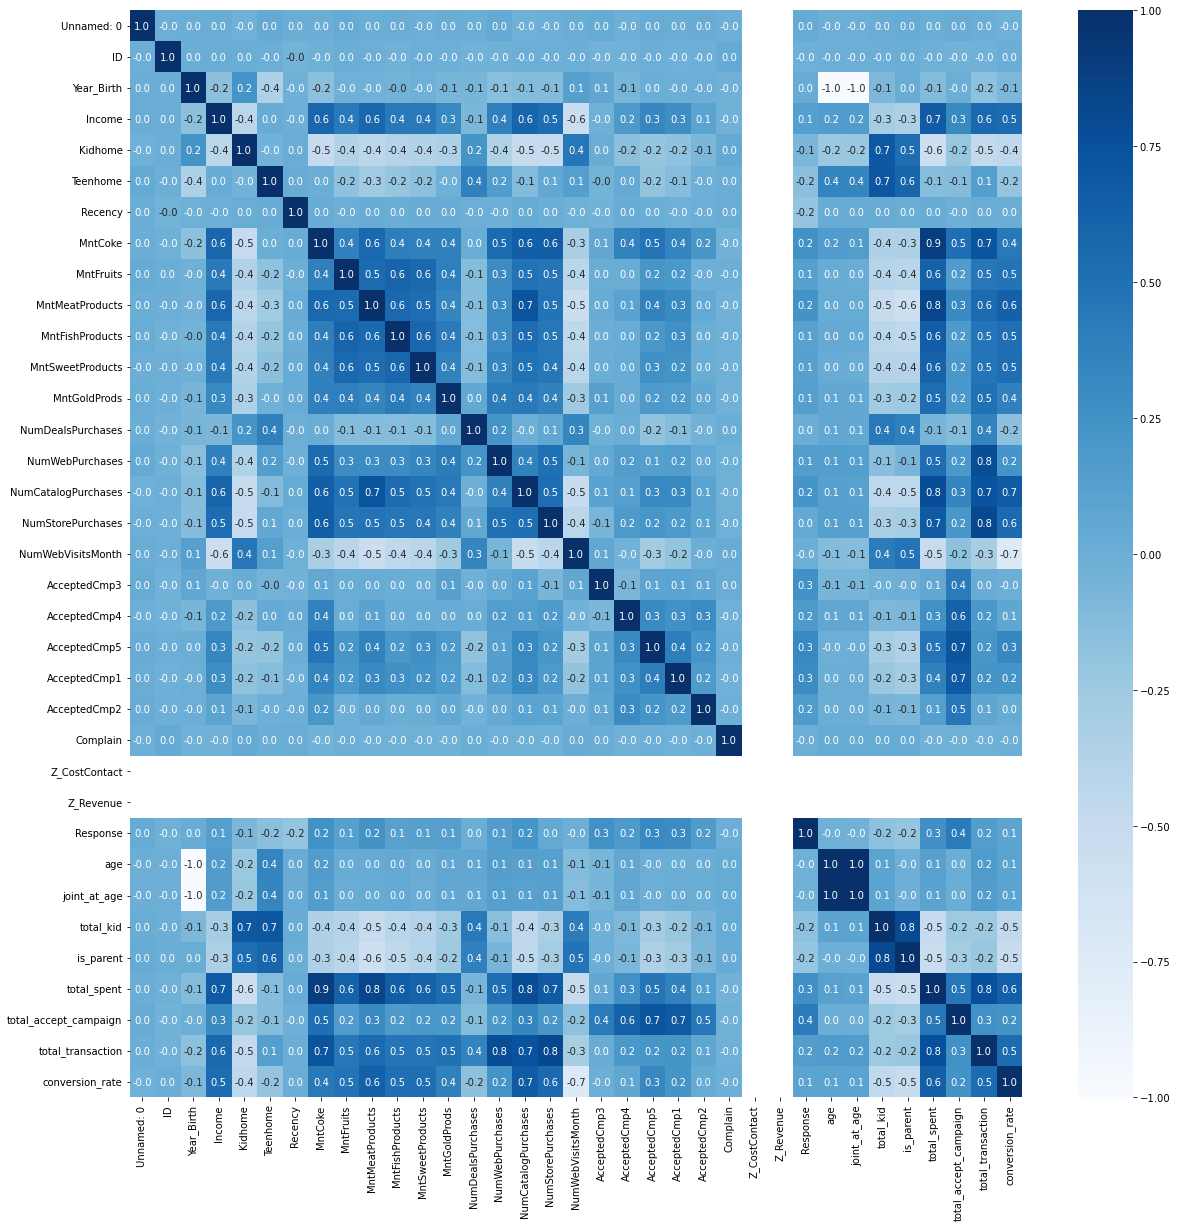

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.1f')

## Age vs Conversion Rate

<function matplotlib.pyplot.show(close=None, block=None)>

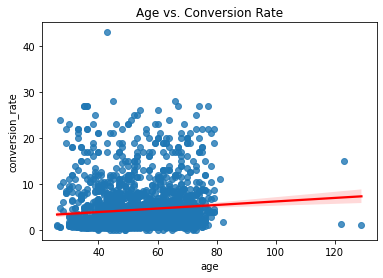

In [14]:
sns.regplot(x = df['age'], y = df['conversion_rate'],line_kws = {'color':'red'})
plt.title('Age vs. Conversion Rate')
plt.show
#plt.savefig('Age vs Conversion Rate.png')

<function matplotlib.pyplot.show(close=None, block=None)>

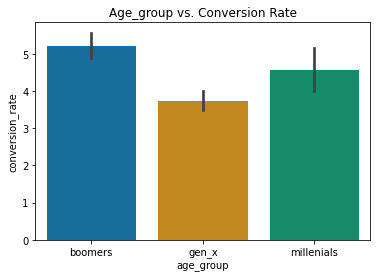

In [15]:
sns.barplot(x = df['age_group'], y = df['conversion_rate'],palette = 'colorblind')
plt.title('Age_group vs. Conversion Rate')
plt.show
#plt.savefig('Age_group vs Conversion Rate.png')

## Spending vs. Conversion Rate

<function matplotlib.pyplot.show(close=None, block=None)>

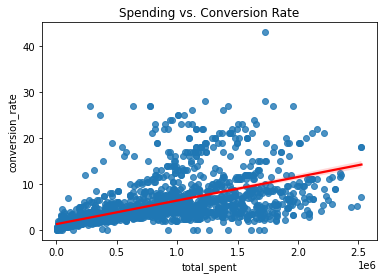

In [16]:
sns.regplot(x = df['total_spent'], y = df['conversion_rate'],line_kws = {'color':'red'})
plt.title('Spending vs. Conversion Rate')
plt.show
#plt.savefig('Spending vs Conversion Rate.png')

## Visit vs. Conversion Rate

<function matplotlib.pyplot.show(close=None, block=None)>

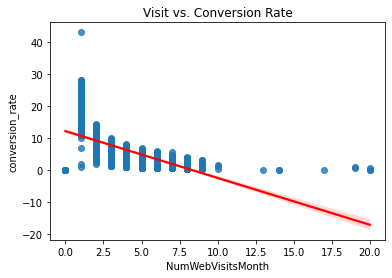

In [17]:
visit_vs_conversion = sns.regplot(x = df['NumWebVisitsMonth'], y = df['conversion_rate'],line_kws = {'color':'red'})
plt.title('Visit vs. Conversion Rate')
plt.show
#plt.savefig('Visit vs Conversion Rate.png')

## Transaction vs. Conversion Rate

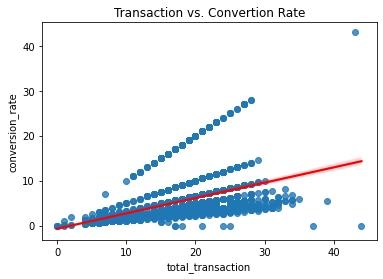

In [18]:
sns.regplot(x = df['total_transaction'], y = df['conversion_rate'],line_kws = {'color':'red'})
plt.title('Transaction vs. Convertion Rate')
plt.show()
#plt.savefig('Transaction vs Conversion Rate.png')

## Visit vs. Transaction

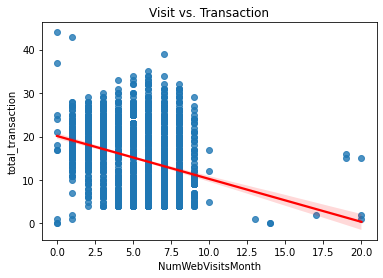

In [19]:
sns.regplot(x = df['NumWebVisitsMonth'], y = df['total_transaction'],line_kws = {'color':'red'})
plt.title('Visit vs. Transaction')
plt.show()
#plt.savefig('Visit vs Transaction.png')

## Campaign vs. Conversion Rate

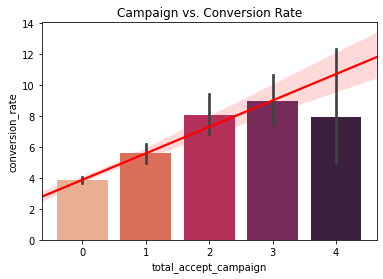

In [20]:
sns.barplot(x = df['total_accept_campaign'], y = df['conversion_rate'],palette='rocket_r')
sns.regplot(x=df['total_accept_campaign'],y = df['conversion_rate'],line_kws ={'color':'red'},
            data=df, scatter=False, truncate=False)
plt.title('Campaign vs. Conversion Rate')
plt.show()
#plt.savefig('Campaign vs Conversion Rate.png')

## Income vs. Conversion Rate

(0.0, 120000000.0)

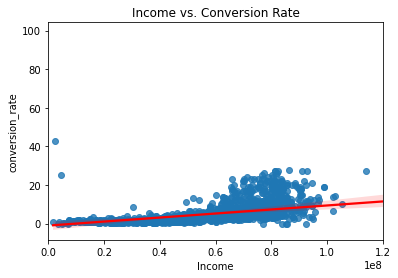

In [21]:
plot = sns.regplot(x = df['Income'], y = df['conversion_rate'],line_kws = {'color':'red'})
plt.title('Income vs. Conversion Rate')
plot.set_xlim(0, 120000000)
#plt.savefig('Income vs Conversion Rate.png')

## Age Group vs Campaign

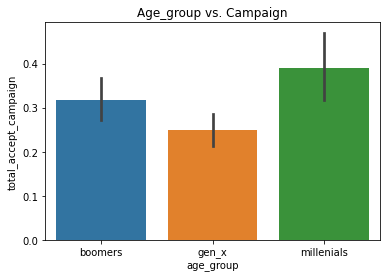

In [22]:
sns.barplot(x = df['age_group'], y = df['total_accept_campaign'])
plt.title('Age_group vs. Campaign')
plt.show()

## Data Cleansing

In [23]:
df.isna().sum().sort_values(ascending = False)

Income                   24
Unnamed: 0                0
Response                  0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
age                       0
NumWebVisitsMonth         0
joint_at_age              0
total_kid                 0
is_parent                 0
total_spent               0
total_accept_campaign     0
total_transaction         0
age_group                 0
AcceptedCmp3              0
NumStorePurchases         0
ID                        0
NumCatalogPurchases       0
Year_Birth                0
Education                 0
Marital_Status            0
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntCoke                   0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds        

In [24]:
df.loc[df.Income.isnull()]

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,age_group,conversion_rate
10,10,1994,1983,S1,Menikah,NaN,1,0,2013-11-15,11,5000,5000,6000,0,2000,1000,1,1,0,2,7,0,0,0,0,0,0,3,11,0,39,30,1,1,19000,0,4,millenials,0.571429
27,27,5255,1986,S1,Lajang,NaN,1,0,2013-02-20,19,5000,1000,3000,3000,263000,362000,0,27,0,0,1,0,0,0,0,0,0,3,11,0,36,27,1,1,637000,0,27,millenials,27.000000
43,43,7281,1959,S3,Lajang,NaN,0,0,2013-05-11,80,81000,11000,50000,3000,2000,39000,1,1,3,4,2,0,0,0,0,0,0,3,11,0,63,54,0,0,186000,0,9,boomers,4.500000
48,48,7244,1951,S1,Lajang,NaN,2,1,2014-01-01,96,48000,5000,48000,6000,10000,7000,3,2,1,4,6,0,0,0,0,0,0,3,11,0,71,63,3,1,124000,0,10,boomers,1.666667
58,58,8557,1982,S1,Lajang,NaN,1,0,2013-06-17,57,11000,3000,22000,2000,2000,6000,2,2,0,3,6,0,0,0,0,0,0,3,11,0,40,31,1,1,46000,0,7,millenials,1.166667
71,71,10629,1973,D3,Menikah,NaN,1,0,2012-09-14,25,25000,3000,43000,17000,4000,17000,3,3,0,3,8,0,0,0,0,0,0,3,11,0,49,39,1,1,109000,0,9,gen_x,1.125000
90,90,8996,1957,S3,Menikah,NaN,2,1,2012-11-19,4,230000,42000,192000,49000,37000,53000,12,7,2,8,9,0,0,0,0,0,0,3,11,0,65,55,3,1,603000,0,29,boomers,3.222222
91,91,9235,1957,S1,Lajang,NaN,1,1,2014-05-27,45,7000,0,8000,2000,0,1000,1,1,0,2,7,0,0,0,0,0,0,3,11,0,65,57,2,1,18000,0,4,boomers,0.571429
92,92,5798,1973,S2,Bertunangan,NaN,0,0,2013-11-23,87,445000,37000,359000,98000,28000,18000,1,2,4,8,1,0,0,0,0,0,0,3,11,0,49,40,0,0,985000,0,15,gen_x,15.000000
128,128,8268,1961,S3,Menikah,NaN,0,1,2013-11-07,23,352000,0,27000,10000,0,15000,3,6,1,7,6,0,0,0,0,0,0,3,11,0,61,52,1,1,404000,0,17,boomers,2.833333


In [25]:
df_clean = df.copy()

In [26]:
# Drop Missing Value from Income Column
df_clean = df_clean.dropna(subset=['Income'])
df_clean.isna().sum()

Unnamed: 0               0
ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntCoke                  0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
age                      0
joint_at_age             0
total_kid                0
is_parent                0
total_spent              0
total_accept_campaign    0
total_transaction        0
a

In [27]:
# Check Duplicate data
df_clean.duplicated().sum()

0

## Drop unnecessary Column

In [28]:
df_clean = df_clean.drop(columns=['Unnamed: 0','Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'])

In [29]:
df_clean.shape

(2216, 34)

## Exploratory Data Analysis

### Statistical Summary

In [30]:
cat = df_clean.select_dtypes(include = 'object')
numerical = df_clean.select_dtypes(exclude = 'object')

In [31]:
cat_cols = cat.columns.to_list()
print('Data category: ',cat_cols)

Data category:  ['Education', 'Marital_Status', 'age_group']


In [32]:
numerical_cols = numerical.columns.to_list()
print('Data numerik: ',numerical_cols)

Data numerik:  ['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'age', 'joint_at_age', 'total_kid', 'is_parent', 'total_spent', 'total_accept_campaign', 'total_transaction', 'conversion_rate']


In [33]:
df_clean[numerical_cols].describe()

,ID,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,conversion_rate
count,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000
mean,5588.353339,5.224725e+07,0.441787,0.505415,49.012635,3.050916e+05,26356.046931,1.669959e+05,37637.635379,27028.880866,43965.252708,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,53.179603,44.208032,0.947202,0.714350,6.070754e+05,0.298285,14.880866,4.390755
std,3249.376275,2.517308e+07,0.536896,0.544181,28.948352,3.373279e+05,39793.916518,2.242833e+05,54752.082415,41072.045667,51815.414374,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,12.023812,0.749062,0.451825,6.029005e+05,0.679209,7.670957,4.888816
min,0.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,16.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,2814.750000,3.530300e+07,0.000000,0.000000,24.000000,2.400000e+04,2000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,36.000000,0.000000,0.000000,6.900000e+04,0.000000,8.000000,1.222222
50%,5458.500000,5.138150e+07,0.000000,0.000000,49.000000,1.745000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24500.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,43.000000,1.000000,1.000000,3.965000e+05,0.000000,15.000000,2.612500
75%,8421.750000,6.852200e+07,1.000000,1.000000,74.000000,5.050000e+05,33000.000000,2.322500e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,54.000000,1.000000,1.000000,1.048000e+06,0.000000,21.000000,5.400000
max,11191.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,262000.000000,321000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129.000000,121.000000,3.000000,1.000000,2.525000e+06,4.000000,44.000000,43.000000


In [34]:
df_clean[cat_cols].describe()

,Education,Marital_Status,age_group
count,2216,2216,2216
unique,5,6,3
top,S1,Menikah,gen_x
freq,1116,857,1061


In [35]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Education:
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64

Value count kolom Marital_Status:
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64

Value count kolom age_group:
gen_x         1069
boomers        786
millenials     385
Name: age_group, dtype: int64



## Feature Encoding

In [36]:
# Label encoder for education
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}
df_clean['education_mapped'] = df_clean['Education'].map(mapping_education)

In [37]:
# One hot encoder
for cat in ['Marital_Status','age_group','is_parent']:
    onehots = pd.get_dummies(df_clean[cat], prefix = cat)
    df_clean = df_clean.join(onehots)

In [38]:
df_cleaned = df_clean[['ID','Education','Marital_Status','Income','Recency','NumWebVisitsMonth','Complain','Response','age','joint_at_age','total_kid','is_parent','total_spent',
                       'total_accept_campaign','total_transaction','age_group','conversion_rate']].copy()

In [39]:
df_cleaned

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,age_group,conversion_rate
0,5524,S1,Lajang,58138000.0,58,7,0,1,65,55,0,0,1617000,0,25,boomers,3.571429
1,2174,S1,Lajang,46344000.0,38,5,0,0,68,60,2,1,27000,0,6,boomers,1.200000
2,4141,S1,Bertunangan,71613000.0,26,4,0,0,57,48,0,0,776000,0,21,gen_x,5.250000
3,6182,S1,Bertunangan,26646000.0,26,6,0,0,38,30,1,1,53000,0,8,millenials,1.333333
4,5324,S3,Menikah,58293000.0,94,5,0,0,41,33,1,1,422000,0,19,millenials,3.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,S1,Menikah,61223000.0,46,5,0,0,55,46,1,1,1341000,0,18,gen_x,3.600000
2236,4001,S3,Bertunangan,64014000.0,56,7,0,0,76,68,3,1,444000,1,22,boomers,3.142857
2237,7270,S1,Cerai,56981000.0,91,6,0,0,41,33,0,0,1241000,1,19,millenials,3.166667
2238,8235,S2,Bertunangan,69245000.0,8,3,0,0,66,58,1,1,843000,0,23,boomers,7.666667


## Feature Standarization

In [40]:
numerical_feature = ['Income','Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'age','joint_at_age', 
            'total_kid', 'total_spent','total_accept_campaign', 'total_transaction','conversion_rate']

In [41]:
from sklearn.preprocessing import StandardScaler
df_std = df_clean.copy()
ss = StandardScaler()

for col in numerical_feature:
    df_std[col] = ss.fit_transform(df_std[[col]])
    
display(df_std.shape,df_std.head(5))

(2216, 46)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,age_group,conversion_rate,education_mapped,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,age_group_boomers,age_group_gen_x,age_group_millenials,is_parent_0,is_parent_1
0,5524,S1,Lajang,0.234063,0,0,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0,0,0,0,0,0,1,0.986443,0.897752,-1.264803,0,1.675488,-0.439265,1.319446,boomers,-0.167630,2,0,0,0,0,1,0,1,0,0,1,0
1,2174,S1,Lajang,-0.234559,1,1,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0,0,0,0,0,0,0,1.236801,1.313688,1.405806,1,-0.962358,-0.439265,-1.157987,boomers,-0.652811,2,0,0,0,0,1,0,1,0,0,0,1
2,4141,S1,Bertunangan,0.769478,0,0,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0,0,0,0,0,0,0,0.318822,0.315443,-1.264803,0,0.280250,-0.439265,0.797881,gen_x,0.175797,2,1,0,0,0,0,0,0,1,0,1,0
3,6182,S1,Bertunangan,-1.017239,1,0,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,0,0,0,0,0,0,0,-1.266777,-1.181925,0.070501,1,-0.919224,-0.439265,-0.897205,millenials,-0.625532,2,1,0,0,0,0,0,0,0,1,0,1
4,5324,S3,Menikah,0.240221,1,0,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,0,0,0,0,0,0,0,-1.016420,-0.932363,0.070501,1,-0.307044,-0.439265,0.537099,millenials,-0.120865,4,0,0,0,0,0,1,0,0,1,0,1


In [42]:
df_std.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,conversion_rate,education_mapped,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,age_group_boomers,age_group_gen_x,age_group_millenials,is_parent_0,is_parent_1
count,2216.000000,2.216000e+03,2216.000000,2216.000000,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2.216000e+03,2.216000e+03,2216.000000,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1.084265e-16,0.441787,0.505415,-1.175353e-16,-8.517054e-17,-2.835678e-17,-3.542092e-17,2.439885e-17,2.479966e-17,3.649808e-17,1.223700e-16,-1.499252e-16,-1.462428e-16,4.478968e-17,6.773563e-17,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,9.108238e-17,-9.799622e-17,-3.998005e-17,0.714350,6.437891e-17,4.188387e-17,-4.213437e-17,3.391791e-17,2.459838,0.258574,0.104693,0.001354,0.034296,0.214350,0.386733,0.349729,0.478791,0.171480,0.285650,0.714350
std,3249.376275,1.000226e+00,0.536896,0.544181,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,1.000226e+00,1.000226e+00,1.000226e+00,0.451825,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.004825,0.437950,0.306227,0.036777,0.182030,0.410463,0.487112,0.476992,0.499663,0.377013,0.451825,0.451825
min,0.000000,-2.007250e+00,0.000000,0.000000,-1.693488e+00,-9.046404e-01,-6.624630e-01,-7.447440e-01,-6.875744e-01,-6.582331e-01,-8.486891e-01,-1.208121e+00,-1.490800e+00,-9.128373e-01,-1.784893e+00,-2.193591e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.268209e+00,-2.346544e+00,-1.264803e+00,0.000000,-9.988568e-01,-4.392649e-01,-1.940335e+00,-8.983250e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,-6.732620e-01,0.000000,0.000000,-8.642385e-01,-8.334770e-01,-6.121927e-01,-6.733896e-01,-6.327696e-01,-6.338802e-01,-6.749564e-01,-6.881759e-01,-7.609619e-01,-9.128373e-01,-8.618303e-01,-9.563810e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.826092e-01,-6.828022e-01,-1.264803e+00,0.000000,-8.926794e-01,-4.392649e-01,-8.972048e-01,-6.482648e-01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,-3.439972e-02,0.000000,0.000000,-4.365786e-04,-3.872229e-01,-4.613818e-01,-4.414876e-01,-4.683552e-01,-4.634095e-01,-3.757501e-01,-1.682312e-01,-3.112352e-02,-2.293274e-01,-2.464554e-01,2.808287e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.844093e-02,-1.004927e-01,7.050118e-02,1.000000,-3.493494e-01,-4.392649e-01,1.553398e-02,-3.638214e-01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8421.750000,6.466600e-01,1.000000,1.000000,8.633654e-01,5.927571e-01,1.669967e-01,2.910105e-01,2.258390e-01,1.454144e-01,2.323143e-01,3.517135e-01,6.987149e-01,4.541825e-01,6.766069e-01,6.932320e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.195377e-01,8.145651e-01,7.050118e-02,1.000000,7.315041e-01,-4.392649e-01,7.978815e-01,2.064862e-01,3.000000,1.000000,0.000000,0.0000

## Data Modelling

<AxesSubplot:title={'center':'Elbow Method of K-means Clustering'}>

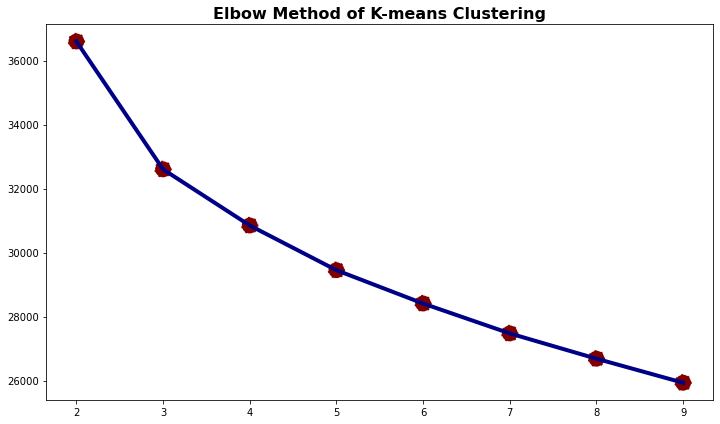

In [43]:
from sklearn.cluster import KMeans
X = df_std.drop(columns=['ID', 'Kidhome','Teenhome','Education', 'Marital_Status', 'age_group','is_parent']).copy()
inertia = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=24)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.title('Elbow Method of K-means Clustering', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('kmeans', dpi=200)

sns.lineplot(x=range(2, 10), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 10), y=inertia, s=300, color='#800000',  linestyle='--')

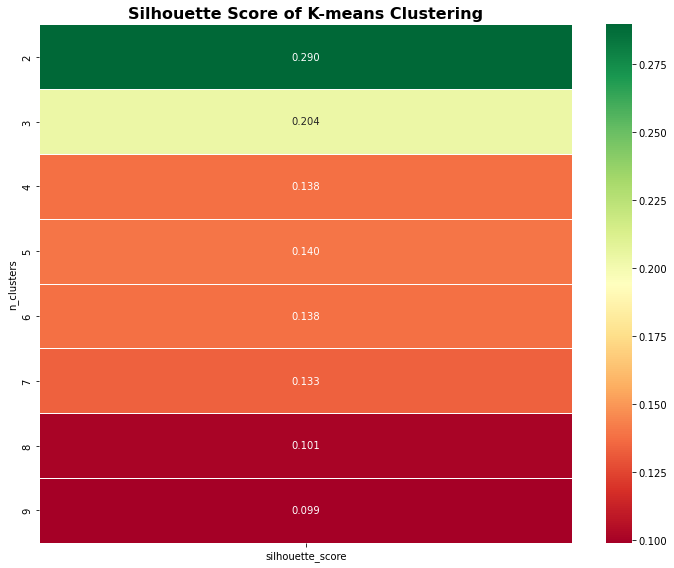

In [44]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=24)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.title('Silhouette Score of K-means Clustering', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('silhouette score', dpi=200)

visualize_silhouette_layer(X)

## Cluster Analysis

In [45]:
kmeans = KMeans (n_clusters = 4, random_state = 24)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df_cleaned['cluster'] = kmeans.labels_

In [46]:
df_cleaned['cluster'].value_counts().to_frame().reset_index().rename(columns={'index':'cluster','cluster':'total_customers'})

,cluster,total_customers
0,2,764
1,0,551
2,3,542
3,1,359


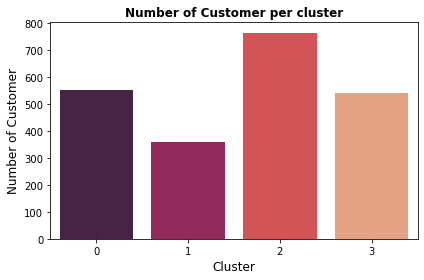

In [47]:
sns.countplot(x = df_cleaned['cluster'],palette = 'rocket')
plt.title('Number of Customer per cluster', fontweight ='bold')
plt.xlabel('Cluster',fontsize = 12)
plt.ylabel('Number of Customer', fontsize = 12)
plt.tight_layout()

In [48]:
dfc0 = df_cleaned[(df_cleaned.cluster == 0)]
dfc1 = df_cleaned[(df_cleaned.cluster == 1)]
dfc2 = df_cleaned[(df_cleaned.cluster == 2)]
dfc3 = df_cleaned[(df_cleaned.cluster == 3)]

In [49]:
df_group_cluster = df_cleaned.groupby(['cluster']).agg({'total_spent': ['count', 'mean', 'median', 'min', 'max'],
                                                'Income':['mean', 'median', 'min', 'max'],
                                                       'age':['mean', 'median', 'min', 'max']}).reset_index()
df_group_cluster.columns = ['cluster','total_customers','mean_spent','median_spent','min_spent','max_spent',
                            'mean_income','median_income','min_income','max_income',
                            'mean_age','median_age','min_age','max_age']
df_group_cluster.sort_values('mean_spent',ascending = False)

,cluster,total_customers,mean_spent,median_spent,min_spent,max_spent,mean_income,median_income,min_income,max_income,mean_age,median_age,min_age,max_age
3,3,542,1.391958e+06,1366500.0,62000,2525000,7.776436e+07,76821000.0,2447000.0,666666000.0,53.697417,53.0,27,123
0,0,551,8.284973e+05,769000.0,235000,1910000,5.967396e+07,60230000.0,4428000.0,94871000.0,56.063521,56.0,30,79
1,1,359,1.605376e+05,112000.0,8000,900000,4.283562e+07,43776000.0,4023000.0,157733000.0,65.428969,65.0,51,129
2,2,764,1.003966e+05,63000.0,5000,467000,3.321111e+07,33103500.0,1730000.0,162397000.0,44.976440,46.0,26,59


In [50]:
cat_cols = ['age_group','Education','Marital_Status','is_parent','total_kid']

## Cluster 0

In [51]:
dfc0.describe()

,ID,Income,Recency,NumWebVisitsMonth,Complain,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,conversion_rate,cluster
count,551.000000,5.510000e+02,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02,551.000000,551.000000,551.000000,551.0
mean,5440.838475,5.967396e+07,48.595281,5.854809,0.009074,0.147005,56.063521,46.911071,1.172414,0.940109,8.284973e+05,0.324864,22.096189,4.238416,0.0
std,3284.342933,1.099195e+07,28.015799,1.777836,0.094913,0.354433,9.652769,9.705354,0.553699,0.237501,3.471128e+05,0.639388,4.402458,2.057494,0.0
min,1.000000,4.428000e+06,0.000000,0.000000,0.000000,0.000000,30.000000,20.000000,0.000000,0.000000,2.350000e+05,0.000000,10.000000,0.000000,0.0
25%,2619.500000,5.331000e+07,26.000000,5.000000,0.000000,0.000000,48.000000,39.000000,1.000000,1.000000,5.485000e+05,0.000000,19.000000,3.000000,0.0
50%,5299.000000,6.023000e+07,49.000000,6.000000,0.000000,0.000000,56.000000,46.000000,1.000000,1.000000,7.690000e+05,0.000000,22.000000,3.800000,0.0
75%,8417.000000,6.640050e+07,71.000000,7.000000,0.000000,0.000000,64.000000,55.000000,1.000000,1.000000,1.043500e+06,0.500000,25.000000,5.000000,0.0
max,11176.000000,9.487100e+07,99.000000,9.000000,1.000000,1.000000,79.000000,70.000000,3.000000,1.000000,1.910000e+06,4.000000,39.000000,25.000000,0.0


In [52]:
for col in cat_cols:
    print(f'value counts of column {col}')
    print(dfc0[col].value_counts())
    print('---'*10, '\n')

value counts of column age_group
gen_x         295
boomers       231
millenials     25
Name: age_group, dtype: int64
------------------------------ 

value counts of column Education
S1     264
S3     157
S2      98
D3      31
SMA      1
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Menikah        235
Bertunangan    135
Lajang          90
Cerai           67
Janda           23
Duda             1
Name: Marital_Status, dtype: int64
------------------------------ 

value counts of column is_parent
1    518
0     33
Name: is_parent, dtype: int64
------------------------------ 

value counts of column total_kid
1    402
2    104
0     33
3     12
Name: total_kid, dtype: int64
------------------------------ 



## Cluster 1

In [53]:
dfc1.describe()

,ID,Income,Recency,NumWebVisitsMonth,Complain,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,conversion_rate,cluster
count,359.000000,3.590000e+02,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.0
mean,5707.607242,4.283562e+07,50.740947,5.707521,0.016713,0.047354,65.428969,56.593315,1.387187,0.832869,160537.604457,0.075209,9.649025,2.084588,1.0
std,3339.482494,1.529169e+07,29.484344,2.283221,0.128373,0.212691,7.297726,7.303597,0.847575,0.373613,138018.066609,0.284464,4.074645,1.659407,0.0
min,13.000000,4.023000e+06,0.000000,0.000000,0.000000,0.000000,51.000000,42.000000,0.000000,0.000000,8000.000000,0.000000,0.000000,0.000000,1.0
25%,2886.500000,3.414350e+07,25.000000,4.000000,0.000000,0.000000,61.000000,51.500000,1.000000,1.000000,47000.000000,0.000000,6.000000,1.000000,1.0
50%,5491.000000,4.377600e+07,52.000000,6.000000,0.000000,0.000000,65.000000,56.000000,1.000000,1.000000,112000.000000,0.000000,9.000000,1.714286,1.0
75%,8624.000000,5.097750e+07,77.000000,7.000000,0.000000,0.000000,70.000000,61.000000,2.000000,1.000000,263500.000000,0.000000,13.000000,2.366667,1.0
max,11188.000000,1.577330e+08,99.000000,20.000000,1.000000,1.000000,129.000000,121.000000,3.000000,1.000000,900000.000000,2.000000,19.000000,13.000000,1.0


In [54]:
for col in cat_cols:
    print(f'value counts of column {col}')
    print(dfc1[col].value_counts())
    print('---'*10, '\n')

value counts of column age_group
boomers    323
gen_x       36
Name: age_group, dtype: int64
------------------------------ 

value counts of column Education
S1     155
S3     102
S2      76
D3      19
SMA      7
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Menikah        123
Bertunangan    116
Lajang          59
Cerai           43
Janda           18
Name: Marital_Status, dtype: int64
------------------------------ 

value counts of column is_parent
1    299
0     60
Name: is_parent, dtype: int64
------------------------------ 

value counts of column total_kid
2    147
1    126
0     60
3     26
Name: total_kid, dtype: int64
------------------------------ 



## Cluster 2

In [55]:
dfc2.describe()

,ID,Income,Recency,NumWebVisitsMonth,Complain,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,conversion_rate,cluster
count,764.000000,7.640000e+02,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.0
mean,5576.760471,3.321111e+07,48.325916,6.645288,0.009162,0.104712,44.976440,36.068063,1.134817,0.888743,100396.596859,0.091623,7.951571,1.317950,2.0
std,3224.953993,1.342757e+07,28.899107,1.837741,0.095343,0.306383,6.808134,6.891640,0.609142,0.314656,96897.554576,0.293187,3.375031,0.798963,0.0
min,9.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000,26.000000,16.000000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,2.0
25%,2721.750000,2.442575e+07,23.750000,6.000000,0.000000,0.000000,40.000000,31.000000,1.000000,1.000000,37750.000000,0.000000,5.000000,0.800000,2.0
50%,5522.000000,3.310350e+07,47.000000,7.000000,0.000000,0.000000,46.000000,37.000000,1.000000,1.000000,63000.000000,0.000000,7.000000,1.142857,2.0
75%,8303.000000,4.059000e+07,75.000000,8.000000,0.000000,0.000000,50.000000,42.000000,1.000000,1.000000,125000.000000,0.000000,10.000000,1.571429,2.0
max,11191.000000,1.623970e+08,99.000000,20.000000,1.000000,1.000000,59.000000,49.000000,3.000000,1.000000,467000.000000,2.000000,18.000000,7.500000,2.0


In [56]:
for col in cat_cols:
    print(f'value counts of column {col}')
    print(dfc2[col].value_counts())
    print('---'*10, '\n')

value counts of column age_group
gen_x         532
millenials    231
boomers         1
Name: age_group, dtype: int64
------------------------------ 

value counts of column Education
S1     395
S2     115
S3     111
D3      97
SMA     46
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Menikah        310
Lajang         190
Bertunangan    181
Cerai           70
Janda           11
Duda             2
Name: Marital_Status, dtype: int64
------------------------------ 

value counts of column is_parent
1    679
0     85
Name: is_parent, dtype: int64
------------------------------ 

value counts of column total_kid
1    503
2    164
0     85
3     12
Name: total_kid, dtype: int64
------------------------------ 



## Cluster 3

In [57]:
dfc3.describe()

,ID,Income,Recency,NumWebVisitsMonth,Complain,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,conversion_rate,cluster
count,542.000000,5.420000e+02,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02,542.000000,542.000000,542.000000,542.0
mean,5675.669742,7.776436e+07,49.260148,2.647601,0.005535,0.285978,53.697417,44.730627,0.162362,0.160517,1.391958e+06,0.710332,20.778598,10.404547,3.0
std,3189.895738,2.799266e+07,29.615288,1.622219,0.074260,0.452296,13.765153,13.812895,0.374097,0.367424,4.217929e+05,1.016974,4.508245,6.140803,0.0
min,0.000000,2.447000e+06,0.000000,0.000000,0.000000,0.000000,27.000000,17.000000,0.000000,0.000000,6.200000e+04,0.000000,11.000000,0.000000,3.0
25%,2980.000000,7.045575e+07,23.000000,1.000000,0.000000,0.000000,43.000000,34.000000,0.000000,0.000000,1.080250e+06,0.000000,17.000000,6.000000,3.0
50%,5530.000000,7.682100e+07,51.500000,2.000000,0.000000,0.000000,53.000000,44.000000,0.000000,0.000000,1.366500e+06,0.000000,21.000000,8.500000,3.0
75%,8487.750000,8.245175e+07,74.000000,3.000000,0.000000,1.000000,65.000000,56.000000,0.000000,0.000000,1.672000e+06,1.000000,24.000000,13.875000,3.0
max,11112.000000,6.666660e+08,99.000000,8.000000,1.000000,1.000000,123.000000,114.000000,2.000000,1.000000,2.525000e+06,4.000000,44.000000,43.000000,3.0


In [58]:
for col in cat_cols:
    print(f'value counts of column {col}')
    print(dfc3[col].value_counts())
    print('---'*10, '\n')

value counts of column age_group
boomers       220
gen_x         198
millenials    124
Name: age_group, dtype: int64
------------------------------ 

value counts of column Education
S1    302
S3    111
S2     76
D3     53
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Menikah        189
Bertunangan    141
Lajang         136
Cerai           52
Janda           24
Name: Marital_Status, dtype: int64
------------------------------ 

value counts of column is_parent
0    455
1     87
Name: is_parent, dtype: int64
------------------------------ 

value counts of column total_kid
0    455
1     86
2      1
Name: total_kid, dtype: int64
------------------------------ 



## Total Income per Cluster

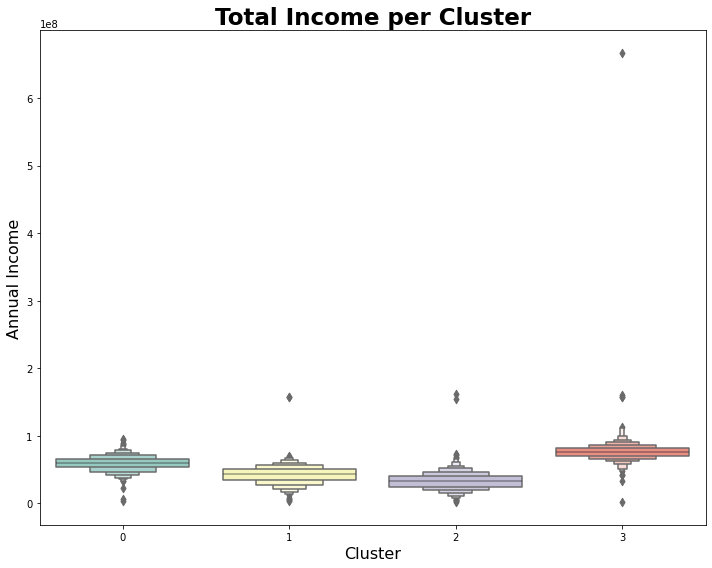

In [59]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=df_cleaned['cluster'], y=df_cleaned['Income'], palette='Set3')
plt.title('Total Income per Cluster', fontsize=23, fontweight='bold')
plt.ylabel('Annual Income', fontsize=16)
plt.xlabel('Cluster', fontsize=16)
plt.tight_layout()


## Total Spending per Cluster

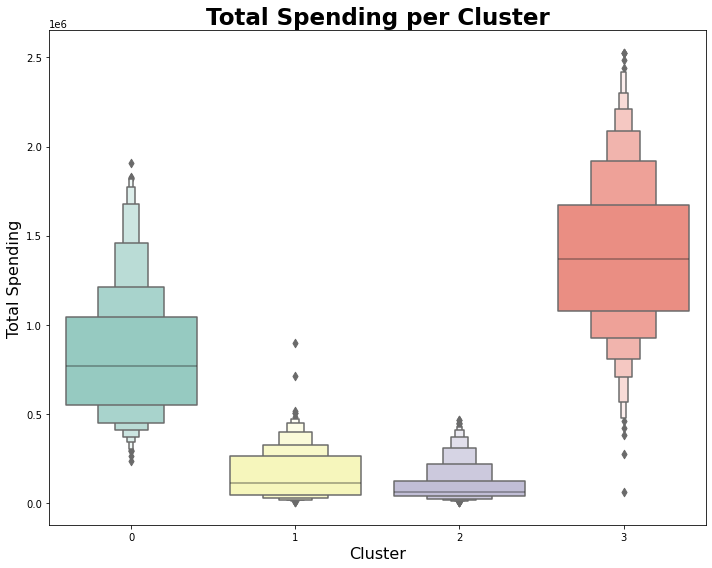

In [60]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=df_cleaned['cluster'], y=df_cleaned['total_spent'], palette='Set3')
plt.title('Total Spending per Cluster', fontsize=23, fontweight='bold')
plt.ylabel('Total Spending', fontsize=16)
plt.xlabel('Cluster', fontsize=16)
plt.tight_layout()

## Total Web Visit per Cluster

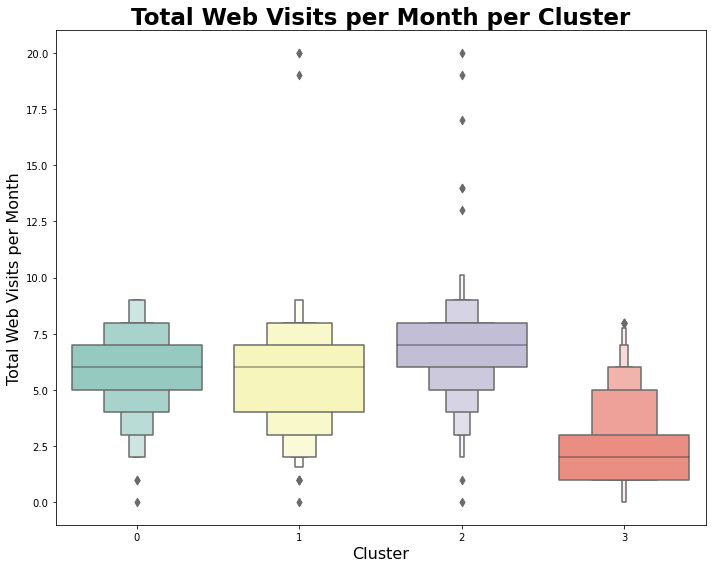

In [61]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=df_cleaned['cluster'], y=df_cleaned['NumWebVisitsMonth'], palette='Set3')
plt.title('Total Web Visits per Month per Cluster', fontsize=23, fontweight='bold')
plt.ylabel('Total Web Visits per Month', fontsize=16)
plt.xlabel('Cluster', fontsize=16)
plt.tight_layout()

## Conversion Rate per Cluster

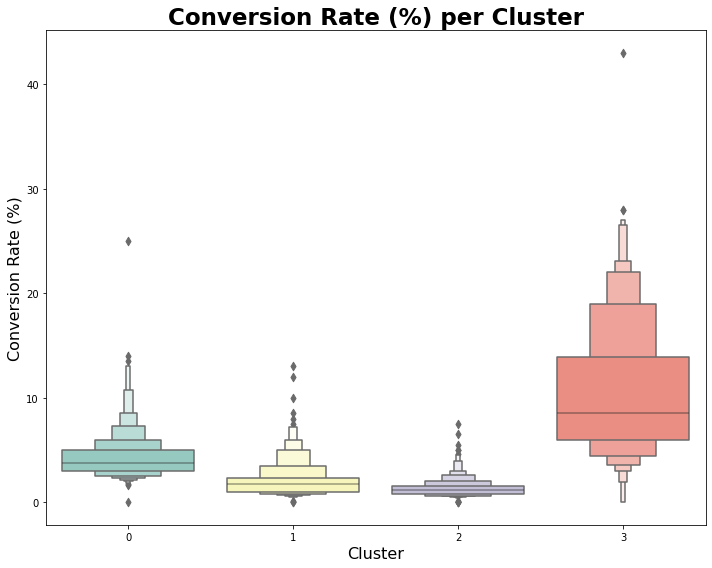

In [62]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=df_cleaned['cluster'], y=df_cleaned['conversion_rate'], palette='Set3')
plt.title('Conversion Rate (%) per Cluster', fontsize=23, fontweight='bold')
plt.ylabel('Conversion Rate (%)', fontsize=16)
plt.xlabel('Cluster', fontsize=16)
plt.tight_layout()

## Distribution of Kids per Clusters

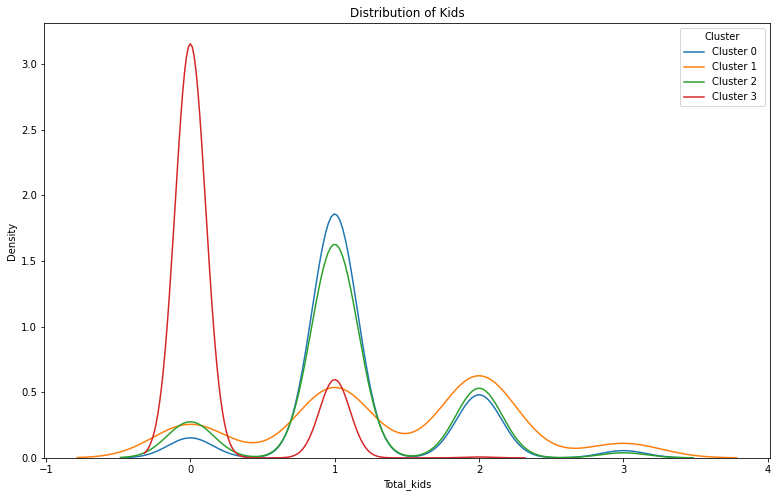

In [63]:
plt.figure(figsize = (13, 8))

sns.kdeplot(df_cleaned.loc[df_cleaned['cluster'] == 0, 'total_kid'])
sns.kdeplot(df_cleaned.loc[df_cleaned['cluster'] == 1, 'total_kid'])
sns.kdeplot(df_cleaned.loc[df_cleaned['cluster'] == 2, 'total_kid'])
sns.kdeplot(df_cleaned.loc[df_cleaned['cluster'] == 3, 'total_kid'])

# Labeling of plot

plt.xlabel('Total_kids')
plt.ylabel('Density')
plt.title('Distribution of Kids')
plt.legend(labels=["Cluster 0 ","Cluster 1","Cluster 2","Cluster 3"], title = "Cluster")
plt.show()

## Distribution of Age per Clusters

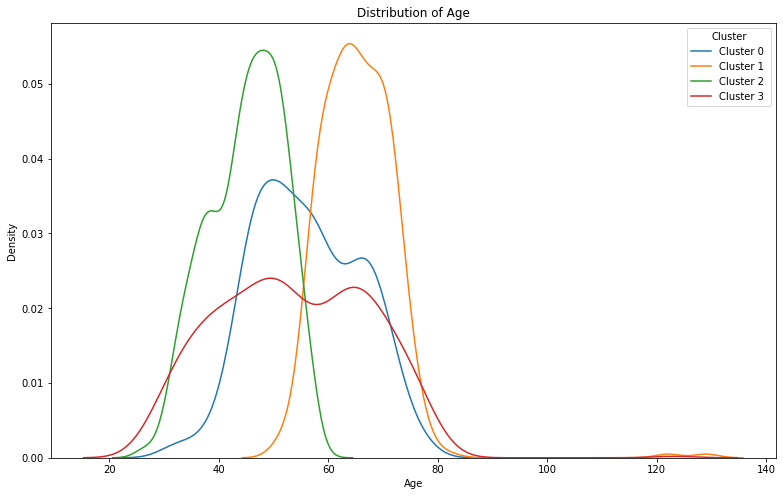

In [64]:
plt.figure(figsize = (13, 8))

sns.kdeplot(df_cleaned.loc[df_cleaned['cluster'] == 0, 'age'])
sns.kdeplot(df_cleaned.loc[df_cleaned['cluster'] == 1, 'age'])
sns.kdeplot(df_cleaned.loc[df_cleaned['cluster'] == 2, 'age'])
sns.kdeplot(df_cleaned.loc[df_cleaned['cluster'] == 3, 'age'])

# Labeling of plot

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age')
plt.legend(labels=["Cluster 0 ","Cluster 1","Cluster 2","Cluster 3"], title = "Cluster")
plt.show()

## Interpretation

1. Cluster 0 <br>
Kelompok ini merupakan kelompok dengan jumlah customer terbanyak kedua. Didominasi oleh gen x (42-58 tahun) dimana mayoritas telah menikah dan memiliki 1 anak.Kelompok ini memiliki intensitas kunjungan web sebanyak 5 kali dalam sebluan dengan rata-rata recency cukup cepat di antara kelompok lainnya.Kelompok ini memiliki rata-rata total transaksi paling tinggi dari kelompok lain,dengan rata-rata total pendapatan sebesar 59 Juta  dan total pengeluaran sebesar 800k dalam setahun. Rata – rata conversion rate untuk kelompok ini adalah 4.23 %
<br>
2. Cluster 1 <br>
Kelompok ini merupakan kelompok dengan jumlah customer paling sedikit di antara kelompok lainnya. Didominasi oleh boomers (>=58 tahun) dimana mayoritas telah menikah dan memiliki 2 anak.Kelompok ini memiliki intensitas kunjungan web sebanyak 5 kali dalam sebluan dengan rata-rata recency paling lama di antara kelompok lainnya.Kelompok ini memiliki rata-rata total transaksi cukup rendah dari kelompok lain,dengan rata-rata total pendapatan sebesar 42 Juta  dan total pengeluaran sebesar 160k dalam setahun. Rata – rata conversion rate untuk kelompok ini adalah 2.08 %
<br>
3. Cluster 2 <br>
Kelompok ini merupakan kelompok dengan jumlah customer terbanyak di antara kelompok lainnya. Didominasi oleh gen x (42-58 tahun)  dimana mayoritas telah menikah dan memiliki 1 anak.Kelompok ini memiliki intensitas kunjungan web sebanyak 6 kali dalam sebluan dengan rata-rata recency paling cepat di antara kelompok lainnya.Kelompok ini memiliki rata-rata total transaksi paling rendah dari kelompok lain,dengan rata-rata total pendapatan sebesar 33 Juta  dan total pengeluaran sebesar 100k dalam setahun. Rata – rata conversion rate untuk kelompok ini adalah 1.31 %
<br>
4. Cluster 3 <br>
Kelompok ini merupakan kelompok dengan jumlah customer terbanyak ketiga di antara kelompok lainnya. Didominasi oleh boomers (>=58 tahun) dimana mayoritas telah menikah dan tidak memiliki anak.Kelompok ini memiliki intensitas kunjungan web sebanyak 3 kali dalam sebluan dengan rata-rata recency cukup lama di antara kelompok lainnya.Kelompok ini memiliki rata-rata total transaksi cukup rendah dari kelompok lain,dengan rata-rata total pendapatan sebesar 77 Juta  dan total pengeluaran sebesar 1,3 Juta dalam setahun. Rata – rata conversion rate untuk kelompok ini adalah 10.40 %
<br>

## Business Recomendation

1. Perlu memperhatikan customer yang termasuk cluster 3 karena kelompok ini menerima campaign dari perusahaan sangat tinggi. Selain itu kelompok ini tergolong high spender dengan pendapatan tertinggi dari kelompok lain. Fokus untuk tingkatkan pelayanan dan memberikan rekomendasi produk yang cocok pada kebutuhan kelompok ini  khususnya platform web karena kelompok ini termasuk rendah untuk melakukan kunjungan web agar kelompok ini dapat menjadi kelompok loyal.<br>
2. Cluster 0 dan cluster 2 memiliki kemiripan dimana didominasi gen x dan termasuk medium spender. Kelompok ini cukup sering melakukan kunjungan web namun transaksi yang diberikan fluktutatif. Perbaikan rekomendasi produk yang dibutuhkan kelompok ini dan memberikan promo dapat menjadi rekomendasi untuk mempertahankan kelompok ini tetap berbelanja.<br>
3. Cluster 1 tergolong low spender dan memiliki recency paling lama dari kelompok lain.Meskipun kelompok ini cukup sering melakukan kunjungan ke web namun transaksi yang diberikan sangat rendah. Diduga hal ini dapat disebabkan oleh produk yang tidak sesuai atau harga yang tidak cocok<br>


